<div id="dist-gamma">
<h3>Ejemplo Máxima verosimilitud Distribución Gamma.</h3>
<p>La distribución gamma de parámetros <span class="math inline">\(\alpha&gt;0\)</span> y <span class="math inline">\(\beta&gt;0\)</span>, <span class="math inline">\(\Gamma(\alpha,\beta)\)</span>, tiene función de densidad <span class="math display">\[
f(x;\alpha,\beta)= \frac{1}{\Gamma(\alpha)\beta^\alpha} \, x^{\alpha-1} e^{-x/\beta} \; , \quad 0&lt;x&lt;\infty \, ,
\]</span> donde <span class="math display">\[
\Gamma(\alpha) = \int_0^\infty t^{\alpha-1} e^{-t} dt
\]</span> es la función gamma.</p>
<p>El parámetro <span class="math inline">\(\alpha\)</span> se denomina <em>parámetro de forma</em> porque es el que determina el grado de asimetría y apuntamiento de la densidad (por ejemplo, el coeficiente de asimetría de una <span class="math inline">\(\Gamma(\alpha,\beta)\)</span> es <span class="math inline">\(2/\sqrt{\alpha}\)</span>). El parámetro <span class="math inline">\(\beta\)</span> se denomina <em>parámetro de escala</em> porque donde más influye es en la dispersión de la distribución. Concretamente, si <span class="math inline">\(X\sim \Gamma(\alpha,\beta)\)</span> se cumple que <span class="math inline">\(\mathbb E(X) = \alpha\beta\)</span> y <span class="math inline">\(\mathbb V(X)=\alpha\beta^2\)</span>.</p>


<h3>Las ecuaciones de verosimilitud</h3>
<p>La función de logverosimilitud de la <span class="math inline">\(\Gamma(\alpha,\beta)\) </span> es 
    <span class="math display">\[ \log L(\alpha,\beta) = -n\log \Gamma(\alpha)-n\alpha\log\beta+(\alpha-1)\sum_{i=1}^n \log x_i -\frac{1}{\beta} \sum_{i=1}^n x_i,\]</span> y que las ecuaciones de verosimilitud para llegar a esta expresiones son 
    
    
$$ 0 = \frac{\partial}{\partial\alpha} \log L(\alpha,\beta) = -n \frac{\Gamma(\alpha)}{\Gamma(\alpha)} - n \log\beta + \sum_{i=1}^n \log x_i  \\ 
\tag{1}$$

$$ 0 = \frac{\partial}{\partial\beta} \log L(\alpha,\beta) = \frac{1}{\beta} \left( -n\alpha+\frac{1}{\beta}\sum_{i=1}^n x_i \right). \\ 
\tag{2} $$


Es evidente que podemos despejar $\beta  \ $ de la segunda ecuación obteniendo: <span class="math display">
    
$
\beta = \frac{\bar x}{\alpha},
\tag{3}
$

</span> donde $$ \bar  x=\frac{\sum_{i=1}^n x_{i}}{n} \   \\ $$ es la media muestral. 

Si sustituimos la expresión $(3)$ de $ \beta \ $ en la ecuación de verosimilitud $(1)$ obtenemos la ecuación 

$$
0 = - n \psi(\alpha) - n \log \bar x + n\log \alpha + \sum_{i=1}^n \log x_i, \\
\\
$$

donde 

$$\psi(\alpha) := \frac{d}{d\alpha} \log \Gamma(\alpha) = \frac{\Gamma(\alpha)}{\Gamma(\alpha)} = \int_0^\infty \left( \frac{e^{-t}}{t} - \frac{e^{-\alpha t}}{1-e^{-t}} \right)  dt
\tag{4}
$$

<p>es la llamada <em>función digamma</em>.</p>


<h3>Aproximación numérica de la estimación de máxima verosimilitud</h3>
<p>Observemos que es imposible obtener una expresión explícita para <span class="math inline">\(\hat\alpha\)</span>, el e.m.v. de <span class="math inline">\(\alpha\)</span>, que es raíz de la ecuación (4). Pero sí podemos aproximar el valor de <span class="math inline">\(\hat\alpha\)</span> por métodos numéricos. Denotemos <span class="math display">\[
g(\alpha) = - n \psi(\alpha) - n \log \bar x + n\log \alpha + \sum_{i=1}^n \log x_i,
\]</span> de manera que la ecuación (4) es <span class="math inline">\(0=g(\alpha)\)</span>. El método de Newton aproxima la raíz de esta ecuación mediante la sucesión <span class="math display">\[\begin{equation} \label{SucesionNewton1}
\tag{5}
\alpha_{m} = \alpha_{m-1} - \frac{g(\alpha_{m-1})}{(\alpha_{m-1})} = \alpha_{m-1} \left( 1+\frac{\psi(\alpha_{m-1}) + \log\bar x - \log(\alpha_{m-1}) - \overline{\log x}}{1-\alpha_{m-1}\psi(\alpha_{m-1})} \right),
\end{equation}\]</span> donde <span class="math inline">\(\overline{\log x} := \sum_{i=1}^n \log x_i /n\)</span>.</p>
<p>La función <span class="math inline">\(\psi\)</span> es la <em>función trigamma</em>. Se puede tomar como valor inicial de la iteración el estimador de <span class="math inline">\(\alpha\)</span> por el método de los momentos <span class="math inline">\(\alpha_0 = \bar x^2/s^2\)</span>.</p>


### Contrucción artesanal del  método vs Fit de scipy

In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
from functools import partial, reduce
import operator
import time
import matplotlib.pyplot as plt
import datetime
import math
from scipy.stats import gamma 
import pandas as pd

### funciones necesarias para calcular los parametros

In [2]:
def op_int_digamma(x,alfa):
        return (alfa/((x+alfa)*x))

def op_int_trigamma(x,alfa):
        return (1/np.power(x+alfa,2))    

def digamma(i_digamma,a,Y):
    digamma_aprox = reduce(operator.add,list(map(partial(op_int_digamma,alfa=a),range(1,i_digamma))))
    return (-Y+digamma_aprox)

def trigamma(i_trigamma,a):
    trigamma_aprox =  reduce(operator.add,list(map(partial(op_int_trigamma,alfa=a),range(1,i_trigamma))))
    return trigamma_aprox
    
def log_aleatorio_bakj(x):
    u = np.random.rand(0,1)
    
    alfalog_result = reduce(operator.add,[np.log(x[int(u)]) for i in range(len(x))])
    return np.log(alfalog_result/len(x))

def calcularGamma(data,iterat_NR,i_digamma,i_trigamma):
    alfa=(1/(np.power(np.mean(data),2)))/np.var(data)
    N=len(data)
    #Calcular logaritmo medio de data
    ln_m = reduce(operator.add, [np.log(data[i]) for i in range(len(data)) if data[i]>0 ])
    ln_m=ln_m/N
    #calcular el logaritmo de la media
    media=np.mean(data)
    media_log = np.log(media)
    #constante de Euler-Mascheroni
    Y = 0.5772156649015328606065120900824024310421593359399235988057672348848677267776646709369470632917467495
    count=0
    #rate_learning=0.005
    #tasa_aumento= (1-rate_learning)/(iterat_NR-int(iterat_NR*0.2))
    while(count<iterat_NR):
        X = digamma(i_digamma,alfa,Y)+media_log-np.log(alfa)-ln_m
        #alfa = operator.mul(alfa,rate_learning*(1+operator.truediv(X,1-operator.mul(alfa,trigamma(i_trigamma,alfa)))))
        alfa = operator.mul(alfa,(1+operator.truediv(X,1-operator.mul(alfa,trigamma(i_trigamma,alfa)))))
        #print(f"iteracion {count}, alfa actual: {alfa}")
        #rate_learning+= tasa_aumento
        count+=1
    return alfa, operator.truediv(media,alfa)

def calcular_min_error(results,target):
    min_err = results[0][target]
    index_error=-1
    for i in range(len(results)-1):
        if(min_err>results[i][target]):
            min_err=results[i][target]
            index_error=i
    return index_error

### Generación de los datos de la distribución

In [3]:
x = np.random.gamma(5,size=50) 

iterat_NR = 30  #ITERACIONES NEWTON-RAPHSON (número mágico estadistica)
i_digamma = 100  #ITERACIONES CONVERGENCIA DIGAMMA
i_trigamma = 100 #ITERACIONES CONVERGENCIA TRIGAMMA
ajuste = []
alfa_fit,media_fit,scale_fit = gamma.fit(x) #fit gamma, parametros ---> a: forma, b: media (alfa/beta), c:escala (1/beta)
index=-1
L=N=LY = True
for i in range(2,i_digamma):
    for j in range(2,i_trigamma):
            alfa,beta = calcularGamma(x,iterat_NR,i,j)
            media_loc = alfa/beta
            alfa_err = (np.absolute(alfa-alfa_fit)/(alfa_fit))*100
            scale_err = (np.absolute((1/beta)-scale_fit)/(scale_fit))*100
            loc_error = (np.absolute(media_loc-media_fit)/(media_fit))*100
            ajuste.append([alfa,media_loc,1/beta, alfa_err,loc_error,scale_err])

### Plot de los Errores Absolutos y valores óptimos

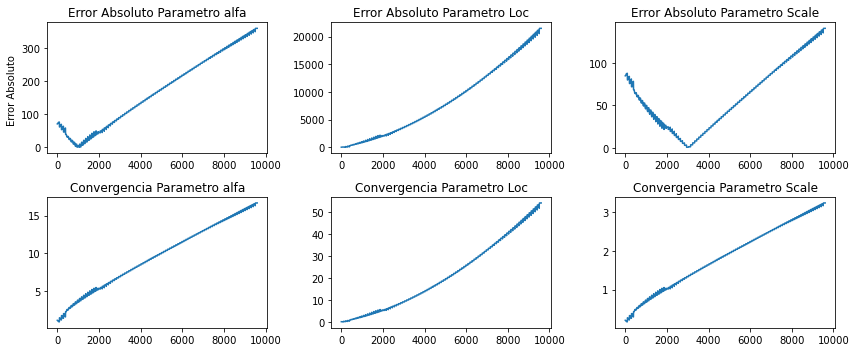

In [4]:
df = pd.DataFrame(ajuste)
df.columns = ["alfa_value","loc_value","scale_value","alfaerror","mediaerror","scaleerror"]
fig, ax1 = plt.subplots(2,3,figsize=(12, 5), tight_layout=True)

ax1[0,0].plot(df.alfaerror.values,label="Error Alfa")
ax1[0,1].plot(df.mediaerror.values,label="Error Loc")
ax1[0,2].plot(df.scaleerror.values,label="Error Scale")
ax1[0,0].set_ylabel("Error Absoluto ")
ax1[0,0].set_title("Error Absoluto Parametro alfa")
ax1[0,1].set_title("Error Absoluto Parametro Loc")
ax1[0,2].set_title("Error Absoluto Parametro Scale")

ax1[1,0].plot(df.alfa_value.values,label="curva Optimo valor Alfa")
ax1[1,1].plot(df.loc_value.values,label="curva Optimo valor Loc")
ax1[1,2].plot(df.scale_value.values,label="curva Optimo valor Scale")
ax1[0,0].set_ylabel("Error Absoluto ")
ax1[1,0].set_title("Convergencia Parametro alfa")
ax1[1,1].set_title("Convergencia Parametro Loc")
ax1[1,2].set_title("Convergencia Parametro Scale")
plt.show();

### Resultados de la función fit de Scipy

In [5]:
display(alfa_fit,media_fit,scale_fit)

3.631666116303538

0.25034662424080434

1.348264417536546

### Calculo los índices en donde se encuentran los óptimos

In [6]:
index_alfa = calcular_min_error(ajuste,3)# alfa
index_loc = calcular_min_error(ajuste,4)# loc
index_scale = calcular_min_error(ajuste,5)# scale

In [7]:
display(f"index_alfa: {index_alfa}, index_loc: {index_loc}, index_scale: {index_scale}")

'index_alfa: 953, index_loc: 173, index_scale: 2964'

### Resultados de mi función Artesana

In [8]:
display(ajuste[index_alfa][0],ajuste[index_loc][1],ajuste[index_scale][2])

3.635776221674857

0.25037022407444587

1.337400721840257

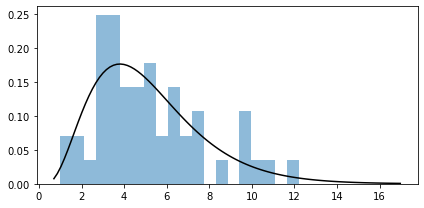

In [9]:
#fit de Scipy
dist = scipy.stats.gamma(alfa_fit,media_fit,scale_fit)
x_plot = np.linspace(dist.ppf(0.001), dist.ppf(0.999), num=100)
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.hist(x, bins=20, density=True, alpha=0.5);
ax.plot(x_plot, dist.pdf(x_plot), c='k');

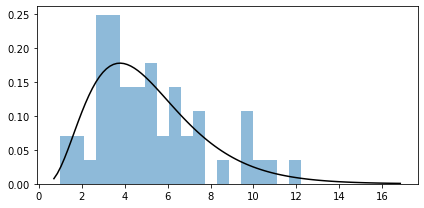

In [10]:
#Función Artesana
dist = scipy.stats.gamma(ajuste[index_alfa][0],ajuste[index_loc][1],ajuste[index_scale][2])
x_plot = np.linspace(dist.ppf(0.001), dist.ppf(0.999), num=100)
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.hist(x, bins=20, density=True, alpha=0.5);
ax.plot(x_plot, dist.pdf(x_plot), c='k');